In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [2]:
data_file_path = "linear_regression.csv"

data = pd.read_csv(data_file_path) #.read_csv is a pandas method used for reading csv files
data.head() #Displays the first five rows, if you want to see more rows enter the number of rows as an argument 

,x,y
0,-4,-9
1,-3,-3
2,-2,-2
3,-1,-1
4,0,0


In [3]:
def linear_regression(w,X,b):
    z=np.dot(X,w)+b
    return z

def initialize_weights(dim):
    w=np.zeros((dim,1))
    b=0
    return w,b

In [4]:
def cost_function(y,y_hat):
    n=len(y)
    loss=np.sum(np.square(y_hat-y))
    return loss/n

def gradients(y,y_hat,X):
    n=len(y)
    dw=np.sum(np.matmul(X.T,y_hat-y))/n
    db=np.sum(y_hat-y)/n
    return dw,db

In [5]:
X = data.drop('y',axis=1)
y = data.drop('x',axis=1)

X = np.array(X)
y = np.array(y)

In [6]:
def fit(X,y,num_iterations,learning_rate):
    loss=[]
    w,b=initialize_weights(X.shape[1])
    for i in range(num_iterations):
        y_hat=linear_regression(w,X,b)
        if(i%100==0):
            print(f"The loss after {i} iterations: {cost_function(y,y_hat)}")
        loss.append(cost_function(y,y_hat))
        dw,db=gradients(y,y_hat,X)
        w=w-(learning_rate*dw)
        b=b-(learning_rate*db)
    
    return loss,w,b

loss,w,b=fit(X,y,2500,0.01)

The loss after 0 iterations: 89.9
The loss after 100 iterations: 6.447853699546357
The loss after 200 iterations: 5.842970607123847
The loss after 300 iterations: 5.756310135033412
The loss after 400 iterations: 5.743894421783344
The loss after 500 iterations: 5.742115641541444
The loss after 600 iterations: 5.741860798417633
The loss after 700 iterations: 5.741824287433186
The loss after 800 iterations: 5.7418190565603
The loss after 900 iterations: 5.741818307141147
The loss after 1000 iterations: 5.741818199773012
The loss after 1100 iterations: 5.741818184390541
The loss after 1200 iterations: 5.7418181821867185
The loss after 1300 iterations: 5.741818181870982
The loss after 1400 iterations: 5.741818181825748
The loss after 1500 iterations: 5.741818181819267
The loss after 1600 iterations: 5.741818181818336
The loss after 1700 iterations: 5.741818181818202
The loss after 1800 iterations: 5.741818181818186
The loss after 1900 iterations: 5.741818181818182
The loss after 2000 iterat

<Axes: >

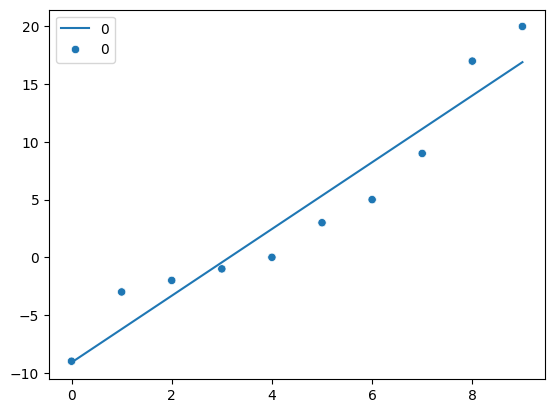

In [7]:
y_pred = linear_regression(w,X,b)
sns.lineplot(y_pred)
sns.scatterplot(y)

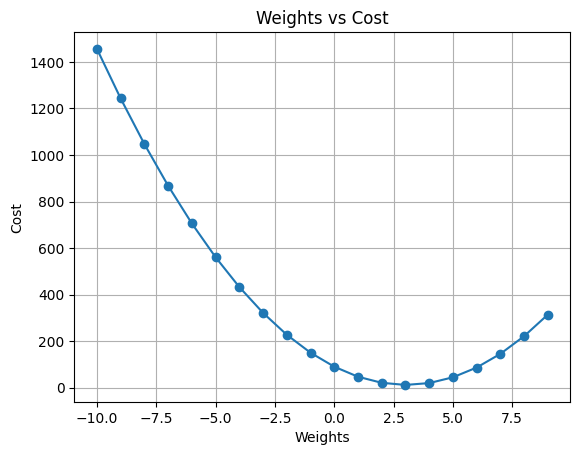

In [8]:
arr = []
for i in range(-10,10):
    w = np.array([i]).reshape(X.shape[1],1)
    y_hat = linear_regression(w,X,b=0)
    cost =  cost_function(y,y_hat)
    arr.append([cost,float(i)])

arr = np.array(arr)

# Plot the weights vs cost
plt.plot(arr[:, 1], arr[:, 0], marker='o')
plt.xlabel('Weights')
plt.ylabel('Cost')
plt.title('Weights vs Cost')
plt.grid(True)
plt.show()
